<a href="https://colab.research.google.com/github/BetulCengiz/MadicalCostAnalysis/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
insurance = pd.read_csv('insurance.csv')# Dataseti yüklüyoruz
df = insurance.copy()  # Asıl veriler bozulmasın diye kopyalama işlemi yapıyoruz
df # Verilere göz atıyoruz

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [29]:
df.head() # İlk birkaç satırı görüntüleyerek veri yapısını anlamaya çalışıyoruz

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.tail() # Son 5 satırı görüntülüyoruz

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [31]:
df.info() # Veri türlerini, eksik verileri ve bellek kullanımını kontrol ediyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
df.describe().T # Temel istatistikleri, sayısal değişkenlerin dağılımlarını inceliyoruz

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [33]:
df.isnull().sum() # Null değer kontrolü -> hiç null değer yok

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
bmi_stats = df["bmi"].describe() # bmi sütununun temel istatistiksel özetini hesaplıyoruz
print(bmi_stats)

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


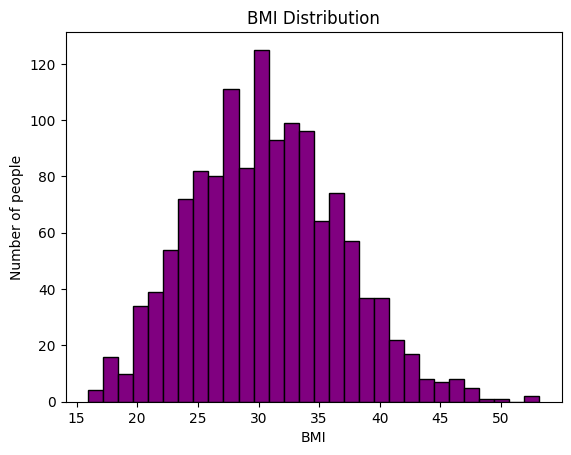

In [35]:
plt.hist(df['bmi'],bins=30, color='purple', edgecolor='black') # bmi verilerinin dağılımını görselleştiren bir histogram oluşturuyoruz
plt.xlabel('BMI')
plt.ylabel('Number of people')
plt.title('BMI Distribution')
plt.show()

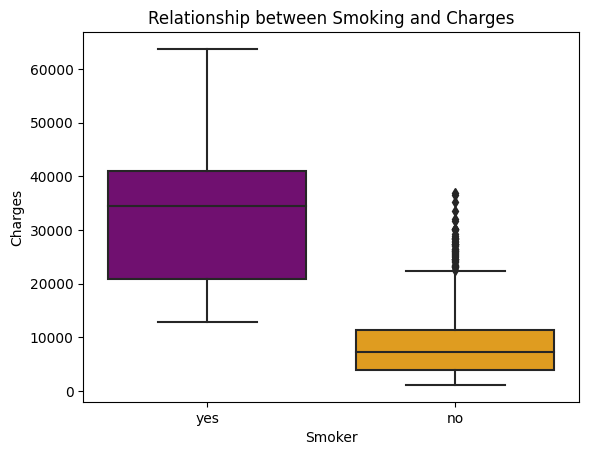

In [36]:
custom_palette = ['purple', 'orange']#özelleştirilmiş bir renk paleti tanımlıyoruz
sns.boxplot(x='smoker', y='charges', data=df,palette=custom_palette) # sigara içme durumu ("smoker") ve sağlık masrafları ("charges") arasındaki ilişkiyi görselleştirmek için bir kutu grafiği oluşturuyoruz
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Relationship between Smoking and Charges')
plt.show()

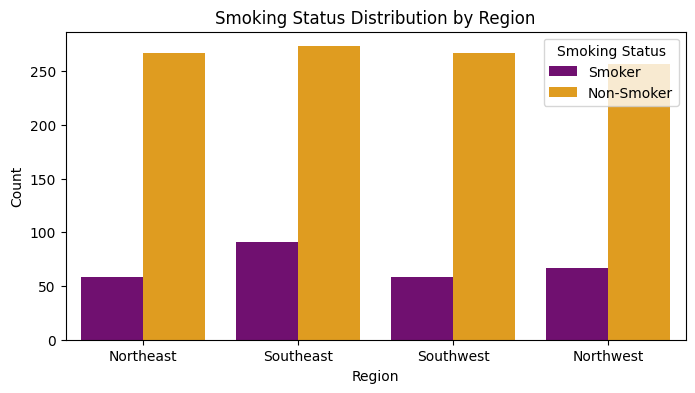

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [37]:
custom_palette = sns.color_palette("Set2", n_colors=2) #"smoker" ve "region" değişkenleri arasındaki ilişkiyi görselleştirmek için bir çubuk grafiği (bar plot) ve çapraz tabloyu oluşturuyoruz
custom_palette = ['purple', 'orange']
plt.figure(figsize=(8, 4))
sns.countplot(x='region', hue='smoker', data=df,palette=custom_palette)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Smoking Status Distribution by Region')
plt.legend(title='Smoking Status', labels=['Smoker', 'Non-Smoker'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Northeast', 'Southeast', 'Southwest', 'Northwest'])
plt.show()
s=pd.crosstab(df['smoker'],df['region'])
s

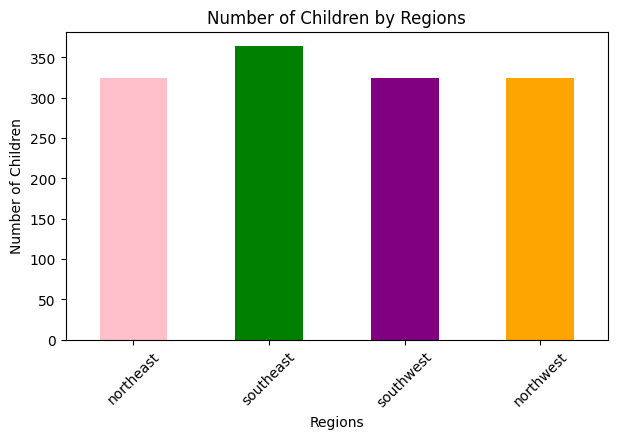

In [38]:
region_names = ['northeast', 'southeast', 'southwest', 'northwest']
region_chd = df['region'].value_counts()
custom_colors = ['pink', 'green', 'purple', 'orange']  # Özelleştirilmiş renkler

plt.figure(figsize=(7, 4))
region_chd[region_names].plot(kind="bar",color=custom_colors)
plt.xticks(rotation=45)
plt.xlabel("Regions")
plt.ylabel("Number of Children")
plt.title("Number of Children by Regions")
plt.show()


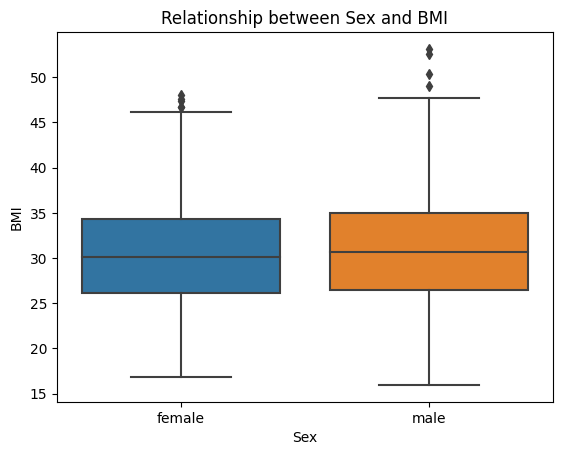

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


In [39]:
sns.boxplot(x='sex', y='bmi', data=df)
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('Relationship between Sex and BMI')
plt.show()
bmi_sex_stats = df.groupby("sex")["bmi"].describe()
print(bmi_sex_stats)

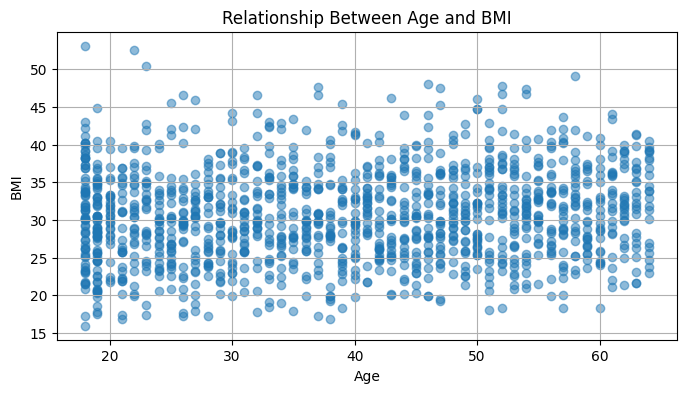

In [40]:
plt.figure(figsize=(8, 4))
plt.scatter(df["age"], df["bmi"], alpha=0.5)
plt.title("Relationship Between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

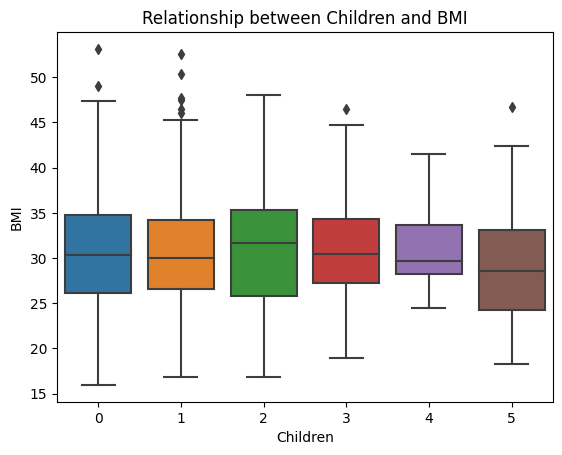

In [41]:
sns.boxplot(x='children', y='bmi', data=df)
plt.xlabel('Children')
plt.ylabel('BMI')
plt.title('Relationship between Children and BMI')
plt.show()

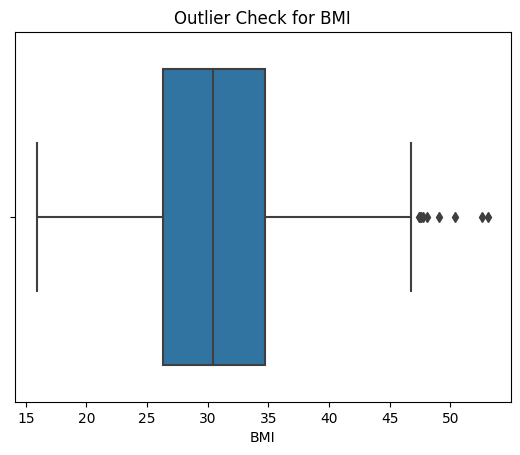

In [42]:
sns.boxplot(x='bmi', data=df)
plt.xlabel('BMI')
plt.title('Outlier Check for BMI')
plt.show()

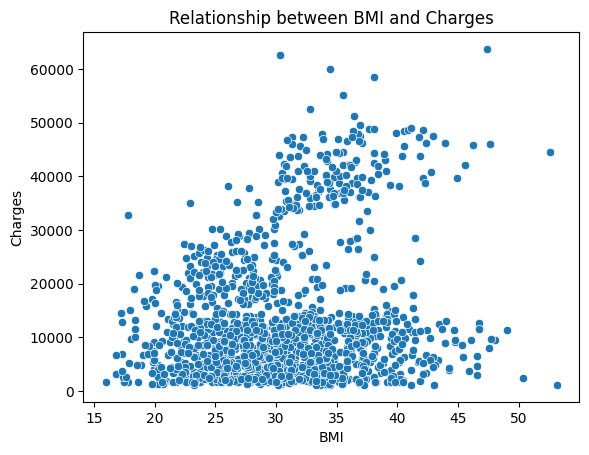

In [43]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')
plt.show()

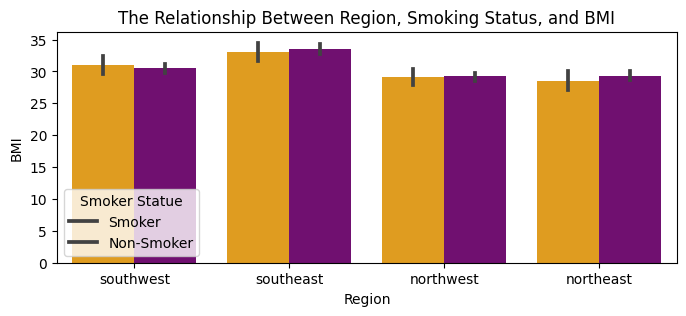

,region,smoker,bmi
0,southwest,yes,27.900
1,southeast,no,33.770
2,southeast,no,33.000
3,northwest,no,22.705
4,northwest,no,28.880


In [44]:
from matplotlib import legend
custom_palette = {"yes": "orange", "no": "purple"}

plt.figure(figsize=(8, 3))
sns.barplot(x="region", y="bmi", hue="smoker", data=df,palette=custom_palette)
plt.title("The Relationship Between Region, Smoking Status, and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
legend_labels = ["Smoker", "Non-Smoker"]
plt.legend(title="Smoker Statue", labels=legend_labels)
plt.show()

reg_smo_bmi = df[["region", "smoker", "bmi"]] #kullanılacak columnları ayırmak
reg_smo_bmi.head()


<ipython-input-45-d82a9bc1f20b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


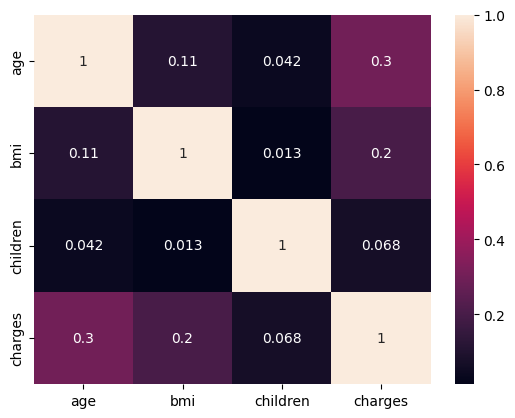

In [45]:
data=df
sns.heatmap(data.corr(),annot=True)
plt.show()
# Veri setindeki sayısal değişkenler arasındaki korelasyonları görselleştiren bir heatmap oluşturduk

## Veri Ön İşleme

In [46]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Kategorik sütunları sayısal hale dönüştür
label_encoder = LabelEncoder() # Kategorik verileri sayısal hale dönüştürüyoruz
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop('charges', axis=1) # Veri setinden "charges" sütununu çıkararak bağımsız değişkenleri  içeren X veri kümesini oluşturuyoruz
y = df['charges'] # Bağımlı değişkeni  içeren y veri kümesini oluşturuyoruz

# Veriyi eğitim ve test kümelerine ayırdık
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Eğitim verisini ölçeklendiriyoruz
X_test_scaled = scaler.transform(X_test) # Test verisini, eğitim verisine uygulanan ölçeklendirme işlemine göre ölçeklendiiyoruz


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Modelleri oluştur
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor()

# Modelleri eğit
linear_reg.fit(X_train_scaled, y_train)
random_forest_reg.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [51]:
# Lineer Regresyon için çapraz doğrulama
linear_scores = cross_val_score(linear_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
linear_rmse_scores = np.sqrt(-linear_scores)

# Rastgele Orman Regresyonu için çapraz doğrulama
forest_scores = cross_val_score(random_forest_reg, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)

# Çapraz doğrulama sonuçlarını görüntüle
print("Lineer Regression RMSE:", linear_rmse_scores.mean())
print("Random Forest Regression RMSE:", forest_rmse_scores.mean())

Lineer Regression RMSE: 6137.623020674888
Random Forest Regression RMSE: 4967.8573862890125


In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


# Rastgele Orman Regresyonu modeli için nesne oluştur
random_forest_reg = RandomForestRegressor()

# Hiperparametre dağılımları
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'bootstrap': [True, False]
}

# Rastgele Arama ile hiperparametre optimizasyonu yapıyoruz
random_search = RandomizedSearchCV(random_forest_reg, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train_scaled, y_train)

# En iyi parametreleri ve skorları görüntüle
print("En İyi Parametreler:", random_search.best_params_)
print("En İyi Negatif MSE Skoru:", random_search.best_score_)

En İyi Parametreler: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 5, 'bootstrap': True}
En İyi Negatif MSE Skoru: -21457001.66514335


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# En iyi parametrelerle eğitilmiş modeli aldık
best_model = random_search.best_estimator_

# Eğitilmiş modelle tahminler yapıyoruz
y_pred = best_model.predict(X_test_scaled)

# Değerlendirme ölçümlerini hesaplayacağız
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Değerlendirme sonuçlarını görüntüledik
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 18704955.794768438
Mean Absolute Error (MAE): 2461.012770865953
R-squared (R2) Score: 0.8795162085059639
